## Предобработка датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
frame = pd.read_csv('/content/drive/MyDrive/Цифровая кафедра. ВКР/mymoviedb.csv',
                     lineterminator='\n')
frame

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [ ]:
dates = frame.Release_Date.values
dates = np.sort(dates)
dates

array(['1902-04-17', '1920-02-27', '1921-01-01', ..., '2023-06-23',
       '2023-07-26', '2024-07-03'], dtype=object)

In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [ ]:
frame.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [ ]:
duplicates = frame.duplicated()
frame[duplicates]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url


In [ ]:
frame.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [ ]:
columns_to_drop = ['Release_Date', 'Popularity', 'Vote_Count',
                   'Vote_Average', 'Original_Language', 'Overview']
frame.drop(columns=columns_to_drop, inplace=True)
frame

,Title,Genre,Poster_Url
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,The Batman,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,No Exit,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,Encanto,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,The King's Man,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...
9822,Badlands,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,Violent Delights,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,The Offering,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,The United States vs. Billie Holiday,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [ ]:
genres = set()
for genre in frame.Genre:
  if genre.count(', ') > 0:
    for g in genre.split(', '):
      genres.add(g)
genres = list(genres)
genres.sort()
genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [ ]:
genre_series = pd.Series(data=0, index=genres)
genre_series

Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [ ]:
for genre in frame.Genre:
  if genre.count(', ') > 0:
    for g in genre.split(', '):
      genre_series[g] += 1
  else:
    genre_series[genre] += 1
genres = genre_series
genres

Action             2686
Adventure          1853
Animation          1439
Comedy             3031
Crime              1242
Documentary         215
Drama              3744
Family             1414
Fantasy            1308
History             427
Horror             1470
Music               295
Mystery             773
Romance            1476
Science Fiction    1273
TV Movie            214
Thriller           2488
War                 308
Western             137
dtype: int64

In [ ]:
# genres = frame.Genre.map(lambda x: x.split(', ')[0] if len(x.split(', ')) > 1 else x).value_counts()
# genres

In [ ]:
genre_columns = genres.index
genre_columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
for genre in genre_columns:
  frame[genre] = 0
frame

,Title,Genre,Poster_Url,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Batman,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,No Exit,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Encanto,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The King's Man,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,Badlands,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9823,Violent Delights,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9824,The Offering,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9825,The United States vs. Billie Holiday,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frame['Genre'] = frame['Genre'].map(lambda x: x.split(', ') if len(x.split(', ')) > 1 else x)
frame['Genre'].value_counts()

Drama                                              466
Comedy                                             403
[Drama, Romance]                                   248
Horror                                             238
[Horror, Thriller]                                 199
                                                  ... 
[Drama, Horror, Thriller, Science Fiction]           1
[Action, Science Fiction, Animation, Adventure]      1
[Comedy, Fantasy, Horror, Science Fiction]           1
[Drama, Science Fiction, Animation]                  1
[War, Drama, Science Fiction]                        1
Name: Genre, Length: 2337, dtype: int64

In [ ]:
for i in frame.index:
  if type(frame['Genre'][i]) is list:
    for genre in frame['Genre'][i]:
      frame.loc[i, genre] = 1
  else:
    genre = frame['Genre'][i]
    frame.loc[i, genre] = 1
frame

,Title,Genre,Poster_Url,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Spider-Man: No Way Home,"[Action, Adventure, Science Fiction]",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,The Batman,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/original/74xTEgt7R3...,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,No Exit,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Encanto,"[Animation, Comedy, Family, Fantasy]",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The King's Man,"[Action, Adventure, Thriller, War]",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,Badlands,"[Drama, Crime]",https://image.tmdb.org/t/p/original/z81rBzHNgi...,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9823,Violent Delights,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9824,The Offering,"[Mystery, Thriller, Horror]",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
9825,The United States vs. Billie Holiday,"[Music, Drama, History]",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
frame['Genre'] = frame['Genre'].map(lambda x: ', '.join(x) if type(x) is list else x)
frame

,Title,Genre,Poster_Url,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,The Batman,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,No Exit,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Encanto,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The King's Man,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,Badlands,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9823,Violent Delights,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9824,The Offering,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
9825,The United States vs. Billie Holiday,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


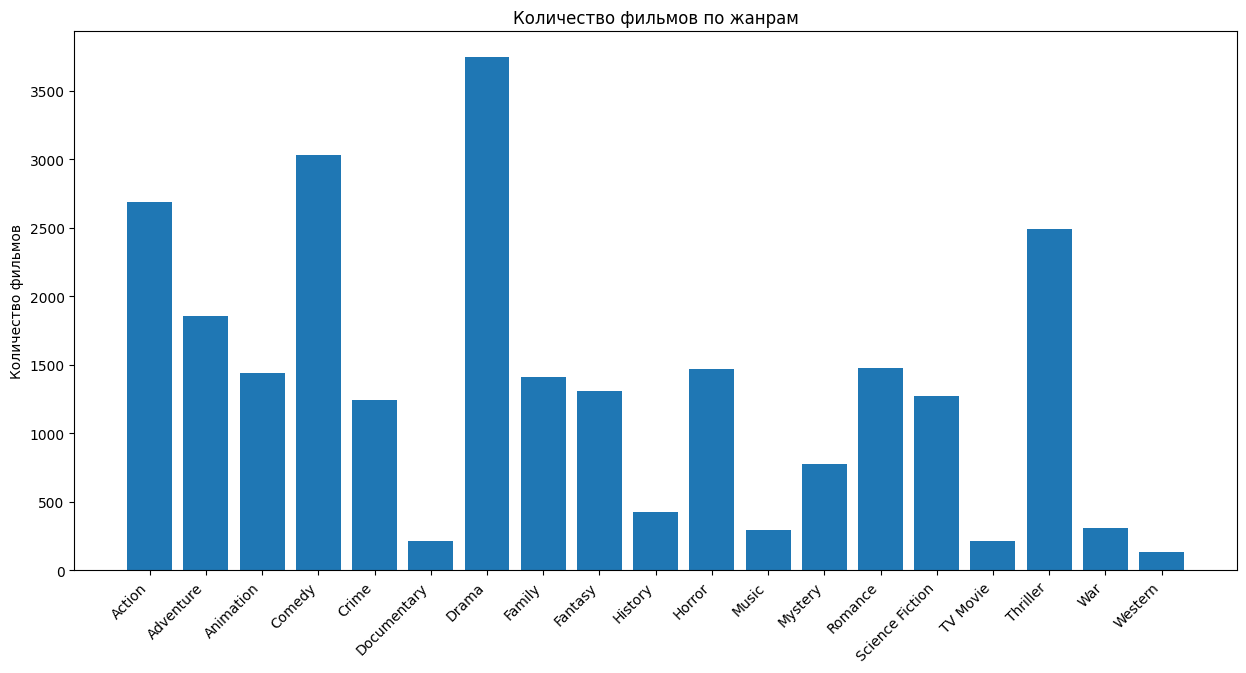

In [ ]:
def plot_genres(genres):
  y_pos = np.arange(len(genres))

  plt.figure(figsize=(15, 7))
  plt.bar(y_pos, genres, align='center')
  plt.xticks(y_pos, genres.index, rotation=45, ha='right', fontsize=10)
  plt.ylabel('Количество фильмов')
  plt.title('Количество фильмов по жанрам')
  plt.show()
plot_genres(genres)

In [ ]:
genres.mean()

1357.5263157894738

In [ ]:
gnrs_to_drop = genres[genres < 1000].index
gnrs_to_drop

Index(['Documentary', 'History', 'Music', 'Mystery', 'TV Movie', 'War',
       'Western'],
      dtype='object')

In [ ]:
index_to_drop = []
for idx in frame.index:
  for gnr in gnrs_to_drop:
    if frame.loc[idx, gnr] == 1:
      index_to_drop.append(idx)
      continue
len(index_to_drop)

2369

In [ ]:
frame.drop(index=index_to_drop, inplace=True)
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7690 entries, 0 to 9823
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            7690 non-null   object
 1   Genre            7690 non-null   object
 2   Poster_Url       7690 non-null   object
 3   Action           7690 non-null   int64 
 4   Adventure        7690 non-null   int64 
 5   Animation        7690 non-null   int64 
 6   Comedy           7690 non-null   int64 
 7   Crime            7690 non-null   int64 
 8   Documentary      7690 non-null   int64 
 9   Drama            7690 non-null   int64 
 10  Family           7690 non-null   int64 
 11  Fantasy          7690 non-null   int64 
 12  History          7690 non-null   int64 
 13  Horror           7690 non-null   int64 
 14  Music            7690 non-null   int64 
 15  Mystery          7690 non-null   int64 
 16  Romance          7690 non-null   int64 
 17  Science Fiction  7690 non-null   

In [ ]:
frame.drop(columns=gnrs_to_drop, inplace=True)

In [ ]:
genres.drop(gnrs_to_drop, inplace=True)

In [ ]:
new_index = pd.RangeIndex(stop=len(frame))
frame.set_index(new_index, inplace=True)
frame

,Title,Genre,Poster_Url,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Horror,Romance,Science Fiction,Thriller
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,1,1,0,0,0,0,0,0,0,0,1,0
1,No Exit,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,0,0,0,0,0,0,0,0,0,0,0,1
2,Encanto,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,0,0,1,1,0,0,1,1,0,0,0,0
3,The Commando,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...,1,0,0,0,1,0,0,0,0,0,0,1
4,Kimi,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7685,I'm in Love With My Little Sister,"Romance, Animation, Drama",https://image.tmdb.org/t/p/original/fRdxgR85XX...,0,0,1,0,0,1,0,0,0,1,0,0
7686,All Is Lost,"Action, Adventure, Drama",https://image.tmdb.org/t/p/original/9cVA4oX2xH...,1,1,0,0,0,1,0,0,0,0,0,0
7687,Amateur Porn Star Killer 2,"Crime, Horror",https://image.tmdb.org/t/p/original/iBmngXVhDu...,0,0,0,0,1,0,0,0,1,0,0,0
7688,Badlands,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
genres = genres.index
gn_ser = pd.Series(data=0, index=genres)
for idx in frame.index:
  for g in genres:
    if frame.loc[idx, g] == 1:
      gn_ser[g] += 1
genres = gn_ser
genres

Action             2291
Adventure          1576
Animation          1244
Comedy             2672
Crime               994
Drama              2738
Family             1209
Fantasy            1136
Horror             1165
Romance            1259
Science Fiction    1108
Thriller           1867
dtype: int64

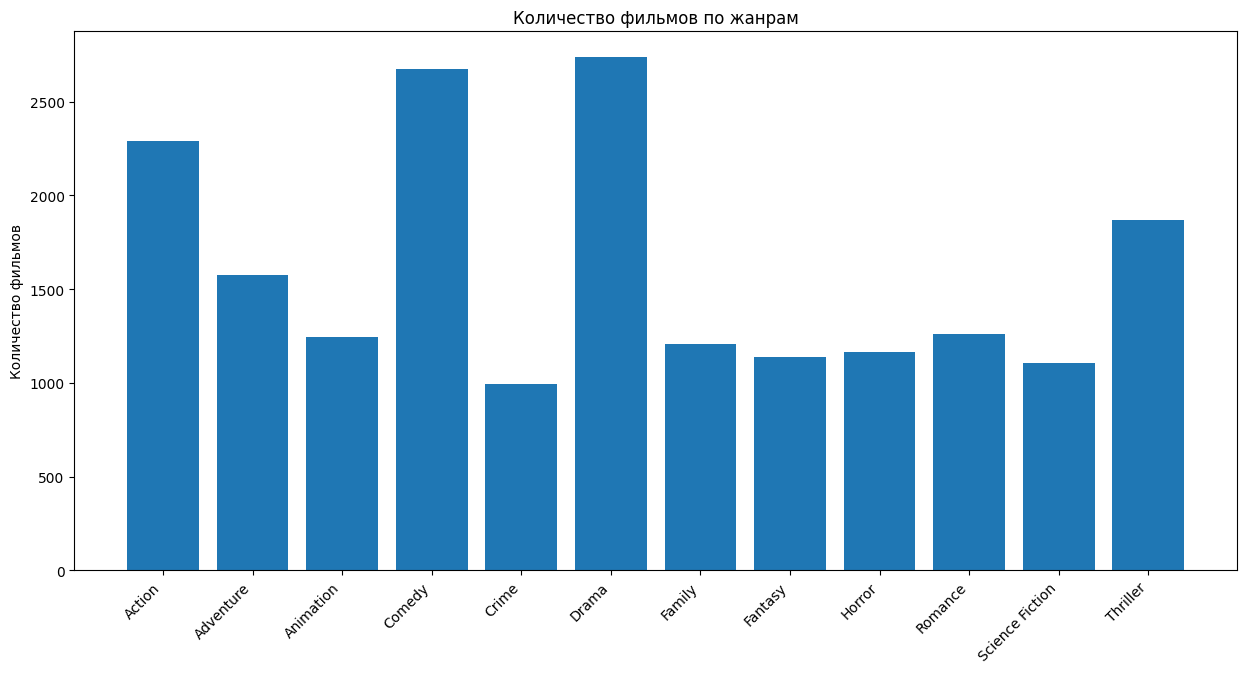

In [ ]:
plot_genres(genres)

In [ ]:
image_urls = frame['Poster_Url']
directory = '/content/drive/MyDrive/Цифровая кафедра. ВКР/poster_images/download_images'

for idx, img_url in image_urls.items():
  path = ''.join([directory, '/{}.jpg'.format(idx)])
  image = io.imread(img_url)
  io.imsave(path, image)
  print(idx)

Выходные данные были обрезаны до нескольких последних строк (5000).
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
28

In [ ]:
import glob

image_paths = glob.glob('*.jpg', root_dir=directory)
frame.insert(loc=3, column='Poster_Path', value=image_paths)
frame

,Title,Genre,Poster_Url,Poster_Path,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Horror,Romance,Science Fiction,Thriller
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,0.jpg,1,1,0,0,0,0,0,0,0,0,1,0
1,No Exit,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,1.jpg,0,0,0,0,0,0,0,0,0,0,0,1
2,Encanto,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2.jpg,0,0,1,1,0,0,1,1,0,0,0,0
3,The Commando,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...,3.jpg,1,0,0,0,1,0,0,0,0,0,0,1
4,Kimi,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...,4.jpg,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7685,I'm in Love With My Little Sister,"Romance, Animation, Drama",https://image.tmdb.org/t/p/original/fRdxgR85XX...,7685.jpg,0,0,1,0,0,1,0,0,0,1,0,0
7686,All Is Lost,"Action, Adventure, Drama",https://image.tmdb.org/t/p/original/9cVA4oX2xH...,7686.jpg,1,1,0,0,0,1,0,0,0,0,0,0
7687,Amateur Porn Star Killer 2,"Crime, Horror",https://image.tmdb.org/t/p/original/iBmngXVhDu...,7687.jpg,0,0,0,0,1,0,0,0,1,0,0,0
7688,Badlands,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,7688.jpg,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
frame.to_csv('/content/drive/MyDrive/Цифровая кафедра. ВКР/mymoviedb_fixed.csv', index=False)

## Разработка модели

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import io
from matplotlib.pyplot import imshow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
new_frame = pd.read_csv('/content/drive/MyDrive/Цифровая кафедра. ВКР/mymoviedb_fixed.csv')
new_frame

,Title,Genre,Poster_Url,Poster_Path,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Horror,Romance,Science Fiction,Thriller
0,Spider-Man: No Way Home,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,0.jpg,1,1,0,0,0,0,0,0,0,0,1,0
1,No Exit,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,1.jpg,0,0,0,0,0,0,0,0,0,0,0,1
2,Encanto,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2.jpg,0,0,1,1,0,0,1,1,0,0,0,0
3,The Commando,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...,3.jpg,1,0,0,0,1,0,0,0,0,0,0,1
4,Kimi,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...,4.jpg,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7685,I'm in Love With My Little Sister,"Romance, Animation, Drama",https://image.tmdb.org/t/p/original/fRdxgR85XX...,7685.jpg,0,0,1,0,0,1,0,0,0,1,0,0
7686,All Is Lost,"Action, Adventure, Drama",https://image.tmdb.org/t/p/original/9cVA4oX2xH...,7686.jpg,1,1,0,0,0,1,0,0,0,0,0,0
7687,Amateur Porn Star Killer 2,"Crime, Horror",https://image.tmdb.org/t/p/original/iBmngXVhDu...,7687.jpg,0,0,0,0,1,0,0,0,1,0,0,0
7688,Badlands,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,7688.jpg,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
genres = new_frame.columns[4:]
num_genres = len(genres)
num_genres

12

In [ ]:
img_width = 100 # 100 или 234, или 300 (оригинал = 667)
img_height = 150 # 150 или 350, или 450 (оригинал = 1000)

# (70%, 15%, 15%)
train_idx = int(len(new_frame) * 0.7)
val_idx = int(len(new_frame) * 0.85)

train_idx, val_idx

(5383, 6536)

In [ ]:
# new_frame['Genre'] = new_frame['Genre'].map(lambda x: x.split(', ') if len(x.split(', ')) > 1 else [x])
# new_frame.head()

In [ ]:
# img_dir = '/content/drive/MyDrive/Цифровая кафедра. ВКР/poster_images/download_images'
# img_generator = ImageDataGenerator(rescale=1/255.0, validation_split=0.3)

# train_dataset = img_generator.flow_from_dataframe(dataframe=new_frame,
#                                                   directory=img_dir,
#                                                   x_col='Poster_Path',
#                                                   y_col='Genre',
#                                                   target_size=(img_height, img_width),
#                                                   batch_size=32,
#                                                   shuffle=True,
#                                                   subset='training')

# val_dataset = img_generator.flow_from_dataframe(dataframe=new_frame,
#                                                   directory=img_dir,
#                                                   x_col='Poster_Path',
#                                                   y_col='Genre',
#                                                   target_size=(img_height, img_width),
#                                                   batch_size=32,
#                                                   shuffle=False,
#                                                   subset='validation')

Found 5383 validated image filenames belonging to 12 classes.
Found 2307 validated image filenames belonging to 12 classes.


In [ ]:
def get_image(path):
  # img_path = keras.utils.get_file(origin=url)
  directory = '/content/drive/MyDrive/Цифровая кафедра. ВКР/poster_images/download_images'
  path = ''.join([directory, '/', path])
  img = keras.utils.load_img(path, target_size=(img_height, img_width))
  x_arr = keras.utils.img_to_array(img)
  return img, x_arr

In [ ]:
def get_datasets(start, end):
  df = new_frame.iloc[start:end]
  image_paths = df['Poster_Path']
  genres = df.iloc[:, 4:]
  print(image_paths.shape, genres.shape)
  data = []

  for idx, img_path in image_paths.items():
    image, x = get_image(img_path)
    y = genres.loc[idx]
    data.append({'x': x, 'y': y})
    print(idx)

  x, y = np.array([d['x'] for d in data]), np.array([d['y'] for d in data])
  data = None

  return x, y

In [ ]:
x_train, y_train = get_datasets(0, train_idx)
x_val, y_val = get_datasets(train_idx, val_idx)
x_test, y_test = get_datasets(val_idx, len(new_frame))

Выходные данные были обрезаны до нескольких последних строк (5000).
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
28

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((5383, 150, 100, 3),
 (5383, 12),
 (1153, 150, 100, 3),
 (1153, 12),
 (1154, 150, 100, 3),
 (1154, 12))

In [ ]:
# input, output = train_dataset[0]
# input_shape = input[0].shape
# input_shape

(150, 100, 3)

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
input_shape = x_train.shape[1:]
input_shape

(150, 100, 3)

Серия экспериментов проводится со следующими значениями:


*   Эпохи (epochs): 10
*   Размер пакета (batch_size): 32, 64, 128, 256



In [ ]:
epochs = 10
batch_size = 32 # 16, 32, 64, 128, 256

### Архитектура сети NiN

In [ ]:
def nin_block(channels, kernel, stride, pad):
  model = keras.models.Sequential(
      [
          layers.Conv2D(channels, kernel_size=kernel, strides=stride,
                        padding=pad, activation='relu'),
          layers.Conv2D(channels, kernel_size=1, activation='relu'),
          layers.Conv2D(channels, kernel_size=1, activation='relu')
      ]
  )
  return model

In [ ]:
model = keras.models.Sequential(
    [
        keras.Input(shape=input_shape),
        nin_block(96, kernel=(11, 11), stride=4, pad='valid'),
        layers.MaxPool2D((3, 3), strides=2),
        nin_block(256, kernel=(5, 5), stride=1, pad='same'),
        layers.MaxPool2D((3, 3), strides=2),
        nin_block(384, kernel=(3, 3), stride=1, pad='same'),
        layers.MaxPool2D((3, 3), strides=2),
        nin_block(num_genres, kernel=(3, 2), stride=1, pad='same'),
        layers.GlobalAveragePooling2D(),
        layers.Reshape((1, 1, num_genres)),
        layers.Flatten()
    ]
)

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 35, 23, 96)        53568     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 11, 96)       0         
 2D)                                                             
                                                                 
 sequential_7 (Sequential)   (None, 17, 11, 256)       746240    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 5, 256)        0         
 2D)                                                             
                                                                 
 sequential_8 (Sequential)   (None, 8, 5, 384)         1180800   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 2, 384)      

In [ ]:
# history = model.fit(
#     train_dataset,
#     epochs=7,
#     validation_data=val_dataset
# )

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    shuffle=True
)

Epoch 1/10
337/337 [==============================] - 223s 655ms/step - loss: 0.7780 - accuracy: 0.2359 - val_loss: 0.6193 - val_accuracy: 0.3018
Epoch 2/10
337/337 [==============================] - 232s 687ms/step - loss: 0.7392 - accuracy: 0.3043 - val_loss: 0.6028 - val_accuracy: 0.2845
Epoch 3/10
337/337 [==============================] - 233s 693ms/step - loss: 0.7344 - accuracy: 0.2800 - val_loss: 0.6056 - val_accuracy: 0.2559
Epoch 4/10
337/337 [==============================] - 233s 689ms/step - loss: 0.7499 - accuracy: 0.2807 - val_loss: 0.6055 - val_accuracy: 0.2853
Epoch 5/10
337/337 [==============================] - 232s 687ms/step - loss: 0.7416 - accuracy: 0.2853 - val_loss: 0.6029 - val_accuracy: 0.1908
Epoch 6/10
337/337 [==============================] - 219s 649ms/step - loss: 0.7336 - accuracy: 0.2684 - val_loss: 0.5964 - val_accuracy: 0.2593
Epoch 7/10
337/337 [==============================] - 223s 662ms/step - loss: 0.7287 - accuracy: 0.2567 - val_loss: 0.6068 -

In [ ]:
model.evaluate(x_test, y_test)

37/37 [==============================] - 14s 373ms/step - loss: 0.5794 - accuracy: 0.2478


[0.579400360584259, 0.24783362448215485]

In [ ]:
def plot_results(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  ax[0].plot(history.history['loss'], color='blue', label='loss')
  ax[0].plot(history.history['val_loss'], color='red', label='val_loss')
  ax[0].set_title('Loss visualization')
  ax[0].legend()
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('loss')

  ax[1].plot(history.history['accuracy'], color='blue', label='accuracy', linestyle='--')
  ax[1].plot(history.history['val_accuracy'], color='red', label='val_accuracy', linestyle='--')
  ax[1].set_title('Accuracy visualization')
  ax[1].legend()
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('accuracy')

  fig.show()

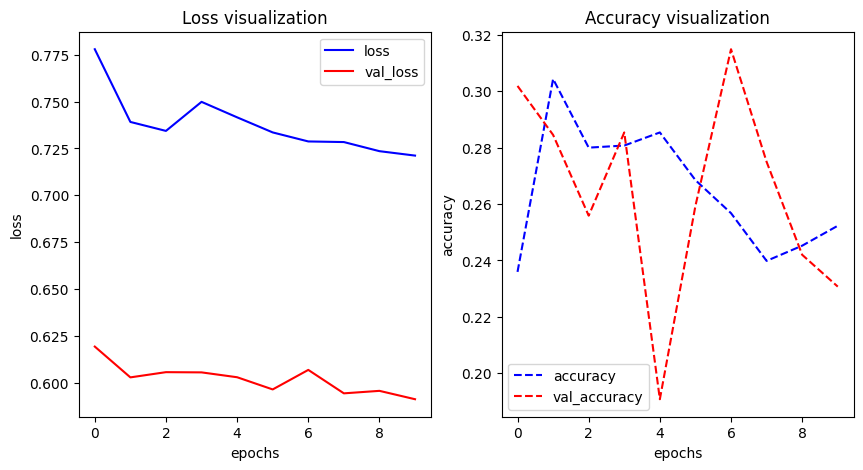

In [ ]:
plot_results(history)

In [ ]:
def test_model(model):
  flm_idx = random.choice(range(x_test.shape[0]))
  film = x_test[flm_idx]
  genre_actual = new_frame.loc[flm_idx + val_idx, 'Genre']
  print(flm_idx)

  genre_pred = model.predict(np.expand_dims(film, axis=0))
  print(genre_pred[0])
  genre_pred = np.argsort(genre_pred[0])[:-4:-1]
  print(genre_pred)
  genres_predicted = []
  for gnr in genre_pred:
    genre = genres[gnr]
    genres_predicted.append(genre)

  print('Predicted genres:', genres_predicted)
  print('True genres:', genre_actual)

  image = keras.utils.array_to_img(film)
  plt.imshow(image)

681
1/1 [==============================] - 0s 32ms/step
[0.37074745 0.         0.05936983 0.10642604 0.14626914 0.3712004
 0.02955836 0.12789874 0.27904007 0.07977922 0.17141955 0.44048896]
[11  5  0]
Predicted genres: ['Thriller', 'Drama', 'Action']
True genres: Action, Horror, Science Fiction, Thriller


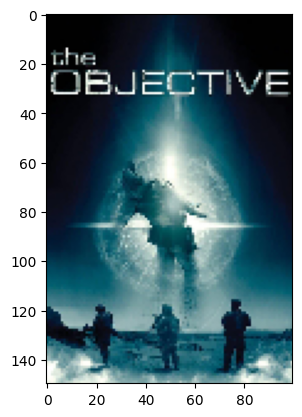

In [ ]:
test_model(model)

### Архитектура сети ZFNet

In [ ]:
def ZF_Net(num_classes):
  return keras.models.Sequential(
      [
          layers.Input(input_shape),
          layers.Conv2D(filters=96, kernel_size=7, strides=2,
                        activation='relu'),
          layers.MaxPooling2D(pool_size=3, strides=2),
          layers.Conv2D(filters=256, kernel_size=5, strides=2, padding='same',
                        activation='relu'),
          layers.MaxPooling2D(pool_size=3, strides=2),
          layers.Conv2D(filters=384, kernel_size=3, padding='same',
                        activation='relu'),
          layers.Conv2D(filters=384, kernel_size=3, padding='same',
                        activation='relu'),
          layers.Conv2D(filters=256, kernel_size=3, padding='same',
                        activation='relu'),
          layers.MaxPooling2D(pool_size=3, strides=2),
          layers.Flatten(),
          layers.Dense(4096, activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(4096, activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(num_classes, activation='softmax')
      ]
  )

In [ ]:
zfnet_model = ZF_Net(num_genres)
zfnet_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(learning_rate=0.0001,
                                   epsilon=1e-5),
                    metrics=['accuracy'])
zfnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 72, 47, 96)        14208     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 35, 23, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 18, 12, 256)       614656    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 5, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 5, 384)         885120    
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 5, 384)        

In [ ]:
path_checkpoint = '/content/drive/MyDrive/Цифровая кафедра. ВКР/models/model_checkpoint_1.h5'
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath=path_checkpoint,
    verbose=1,
    save_best_only=True,
)

In [ ]:
zfnet_history = zfnet_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    shuffle=True,
    callbacks=modelckpt_callback
)

Epoch 1/10
169/169 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.3715
Epoch 1: val_loss improved from inf to 0.41370, saving model to /content/drive/MyDrive/Цифровая кафедра. ВКР/models/model_checkpoint_1.h5
169/169 [==============================] - 380s 2s/step - loss: 0.4160 - accuracy: 0.3715 - val_loss: 0.4137 - val_accuracy: 0.3669
Epoch 2/10
169/169 [==============================] - ETA: 0s - loss: 0.4053 - accuracy: 0.3766
Epoch 2: val_loss did not improve from 0.41370
169/169 [==============================] - 377s 2s/step - loss: 0.4053 - accuracy: 0.3766 - val_loss: 0.4139 - val_accuracy: 0.3721
Epoch 3/10
169/169 [==============================] - ETA: 0s - loss: 0.3906 - accuracy: 0.3942
Epoch 3: val_loss did not improve from 0.41370
169/169 [==============================] - 376s 2s/step - loss: 0.3906 - accuracy: 0.3942 - val_loss: 0.4223 - val_accuracy: 0.3565
Epoch 4/10
169/169 [==============================] - ETA: 0s - loss: 0.3748 - accur

In [ ]:
zfnet_model.evaluate(x_test, y_test)

37/37 [==============================] - 17s 464ms/step - loss: 0.5390 - accuracy: 0.3224


[0.5390064120292664, 0.32235702872276306]

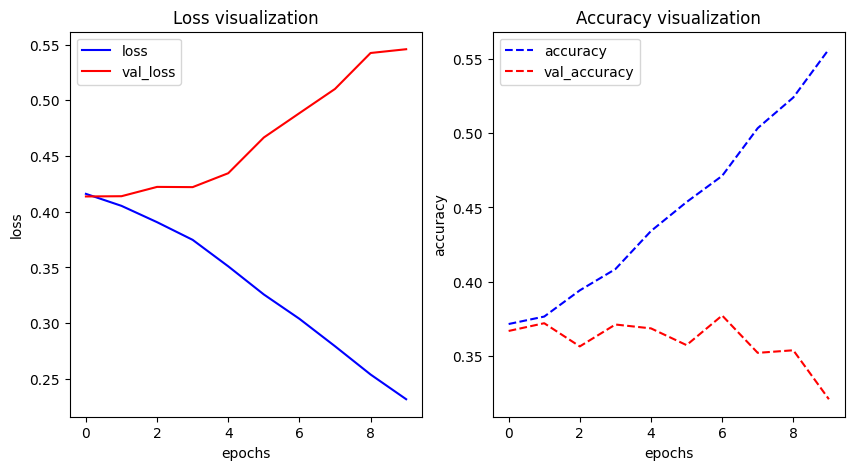

In [ ]:
plot_results(zfnet_history)

625
1/1 [==============================] - 0s 83ms/step
[0.3694417  0.05298834 0.00679968 0.03831023 0.0774287  0.0986281
 0.00434715 0.02240521 0.03692949 0.01313794 0.0382539  0.24132961]
[ 0 11  5]
Predicted genres: ['Action', 'Thriller', 'Drama']
True genres: Crime, Drama


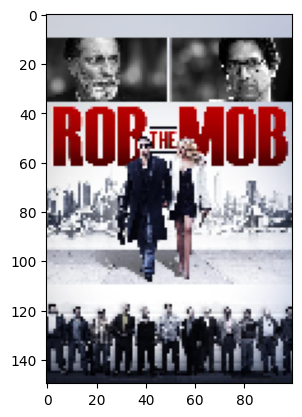

In [ ]:
test_model(zfnet_model)

#### Загрузка "лучшей" модели

In [ ]:
final_model = tf.keras.models.load_model('/content/drive/MyDrive/Цифровая кафедра. ВКР/models/model_checkpoint_1.h5')
final_model.evaluate(x_test, y_test)

37/37 [==============================] - 17s 461ms/step - loss: 0.4135 - accuracy: 0.3536


[0.4134726822376251, 0.35355284810066223]

270
1/1 [==============================] - 0s 48ms/step
[0.03689349 0.03362713 0.02556735 0.16312738 0.01962776 0.44686857
 0.02879203 0.03162754 0.01594163 0.14803462 0.01544606 0.03444638]
[5 3 9]
Predicted genres: ['Drama', 'Comedy', 'Romance']
True genres: Drama, Comedy, Romance


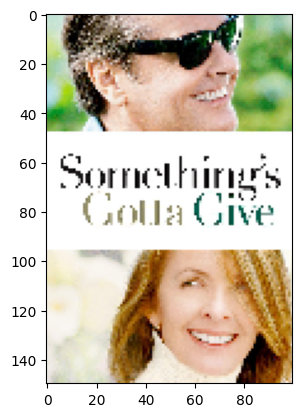

In [ ]:
test_model(final_model)

### Тестирование предобученных моделей

В целом, дообучение предобученных моделей сетей ResNet и DenseNet не позволило при имющихся значениях эпохи и размера пакета значительно увеличить показатель точности при достаточно большой ошибке. Тем не менее, при размере пакета 128 и большом количестве эпох (большем, чем 10 или 15) имеется вероятность улучшения результатов благодаря намечающейся общей тенденции улучшения

#### ResNet

In [ ]:
# загружаем предобученные модели
resnet = keras.applications.ResNet50(include_top=False,
                                     input_shape=(img_height, img_width, 3))
resnet.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [ ]:
input = resnet.input
class_layer = layers.Dense(num_genres, activation='sigmoid')
flatten = layers.Flatten()(resnet.layers[-2].output)
output = class_layer(flatten)
resnet_model = keras.Model(input, output)

In [ ]:
for l, layer in enumerate(resnet_model.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(resnet_model.layers[-1:]):
    layer.trainable = True

resnet_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
resnet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 50, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
resnet_history = resnet_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    shuffle=True
)

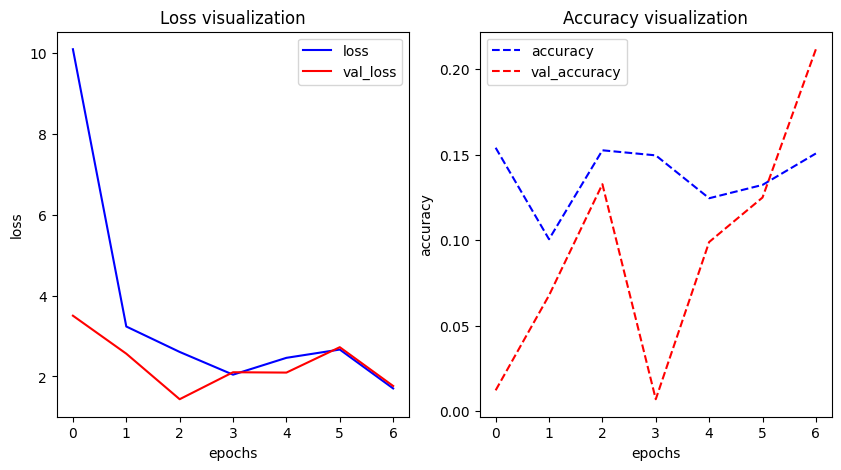

In [ ]:
plot_results(resnet_history)

89
1/1 [==============================] - 0s 86ms/step
Predicted genres: ['Comedy', 'Romance', 'Animation']
Actual genres: Comedy


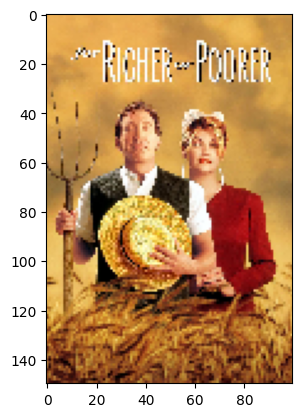

In [ ]:
test_model(resnet_model)

#### DenseNet

In [ ]:
densenet = keras.applications.DenseNet169(include_top=False,
                                          input_shape=(img_height, img_width, 3))
densenet.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 150, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 156, 106, 3)  0          ['input_11[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 50, 64)   9408        ['zero_padding2d_4[0][0]']       
                                                                                        

In [ ]:
input = densenet.input
class_layer = layers.Dense(num_genres, activation='softmax')
flatten = layers.Flatten()(densenet.layers[-2].output)
output = class_layer(flatten)
densenet_model = keras.Model(input, output)

In [ ]:
for l, layer in enumerate(densenet_model.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(densenet_model.layers[-1:]):
    layer.trainable = True

densenet_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
densenet_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 150, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 156, 106, 3)  0          ['input_11[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 50, 64)   9408        ['zero_padding2d_4[0][0]']       
                                                                                            

In [ ]:
densenet_history = densenet_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    shuffle=True
)

Epoch 1/10
169/169 [==============================] - 426s 2s/step - loss: 0.7829 - accuracy: 0.2573 - val_loss: 0.7445 - val_accuracy: 0.3634
Epoch 2/10
169/169 [==============================] - 399s 2s/step - loss: 0.5516 - accuracy: 0.3309 - val_loss: 0.8493 - val_accuracy: 0.1865
Epoch 3/10
169/169 [==============================] - 405s 2s/step - loss: 0.4677 - accuracy: 0.3793 - val_loss: 0.8416 - val_accuracy: 0.2255
Epoch 4/10
169/169 [==============================] - 406s 2s/step - loss: 0.4055 - accuracy: 0.3883 - val_loss: 0.8607 - val_accuracy: 0.2316
Epoch 5/10
169/169 [==============================] - 410s 2s/step - loss: 0.3619 - accuracy: 0.3996 - val_loss: 0.8598 - val_accuracy: 0.2888
Epoch 6/10
169/169 [==============================] - 406s 2s/step - loss: 0.3227 - accuracy: 0.4210 - val_loss: 0.9112 - val_accuracy: 0.3157
Epoch 7/10
169/169 [==============================] - 366s 2s/step - loss: 0.2942 - accuracy: 0.4232 - val_loss: 0.9058 - val_accuracy: 0.3148

In [ ]:
densenet_model.evaluate(x_test, y_test)

37/37 [==============================] - 66s 2s/step - loss: 0.9977 - accuracy: 0.2894


[0.9977174997329712, 0.28942808508872986]

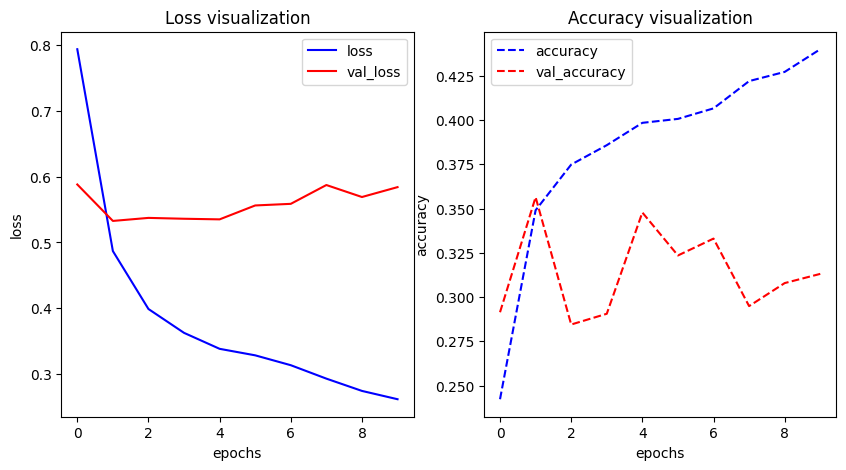

In [ ]:
plot_results(densenet_history)

1129
1/1 [==============================] - 0s 104ms/step
[7.6622479e-03 8.7975210e-01 1.9336437e-04 4.6933642e-06 3.7691334e-05
 6.3327318e-03 1.5101601e-04 5.1516093e-02 1.4381397e-02 3.2053904e-05
 3.9123684e-02 8.1290159e-04]
[ 1  7 10]
Predicted genres: ['Adventure', 'Fantasy', 'Science Fiction']
True genres: Action, Science Fiction, Thriller


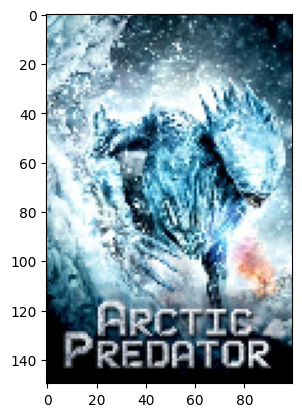

In [ ]:
test_model(densenet_model)